In [1]:
# Importing Modules and Packages ==================================================================================

import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

/Users/mji/opt/anaconda2/lib/python2.7/site-packages/librosa/__init__.py:35: FutureWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  FutureWarning)


In [2]:
# Loading Audio Files =============================================================================================

FIG_SIZE = (16,8)
file_name = 'sample_01.wav'
audio_data = '/Users/mji/Desktop/Coding_Study_2/sample/sample_01.wav'
sig, sr = librosa.load(audio_data, sr = 44100)

sig, len(sig), sig.shape, sr
  # signal이 672000개의 벡터로 이루어져 있다. 
  # sampling rate = 44100Hz / 1초에 44100개의 sample을 뽑았다는 의미.

(array([ 0.0000000e+00, -6.1035156e-05, -1.0681152e-04, ...,
        -2.2705078e-02, -2.3513794e-02, -2.4505615e-02], dtype=float32),
 672000,
 (672000,),
 44100)

In [3]:
# Playing Audio Files =============================================================================================

ipd.Audio(audio_data)

Text(0.5,1,'Waveform of piano_sample_01.wav')

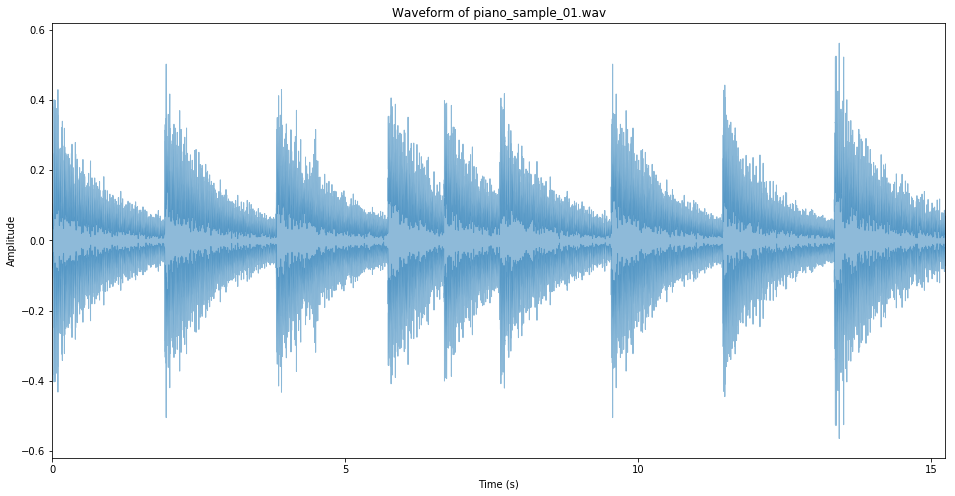

In [4]:
# Displaying Waveform_Time vs. Amplitude_Time Domain ==============================================================

plt.figure(figsize = FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha = 0.5)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of "+ file_name)

672000
672000


Text(0.5,1,'Magnitude Spectrum of piano_sample_01.wav')

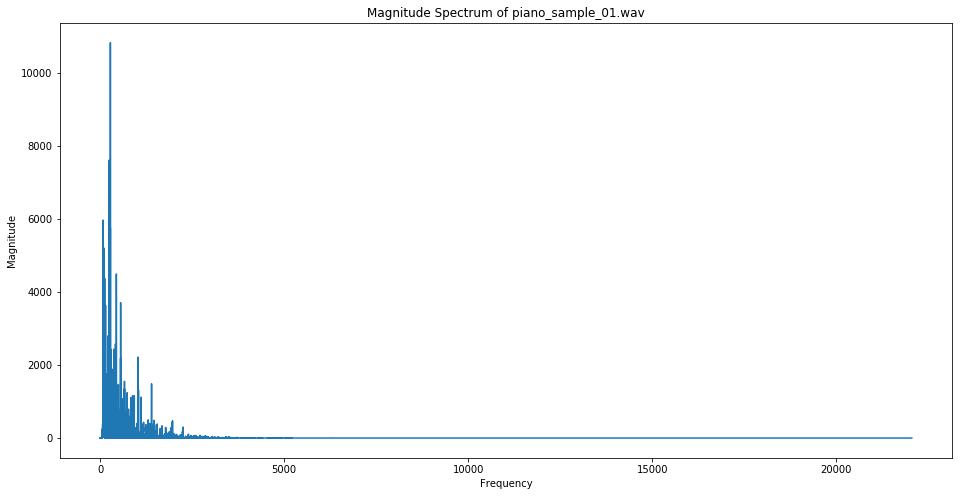

In [5]:
# Fast Fourier Transfrom(FFT) to Spectrum_Frequency vs. Magnitude_Frequency Domain ================================
# FFT를 진행하면, 시간의 정보가 날아간다.

fft = np.fft.fft(sig)

# 복소공간 값 절댓값 취해서, magnitude(분리된 frequency가 전체 소리에 얼마나 영향을 주는지의 정도) 구하기
magnitude = np.abs(fft)
print(len(magnitude))

# magnitude의 제곱이 power / magnitude에 log scale을 하면 dB
#power = magnitude * magnitude
#log_spectrogram = librosa.amplitude_to_db(magnitude)

# Frequency 값 만들기
f = np.linspace(0, sr, len(magnitude))
print(len(f))

# 푸리에 변환을 통과한 spectrum은 대칭구조로 나와서 high frequency 부분 절반을 날리고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

# Display Spectrum
plt.figure(figsize = FIG_SIZE)
plt.plot(left_f, left_spectrum)

plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of "+ file_name)

Text(0.5,1,'Power spectrum of piano_sample_01.wav')

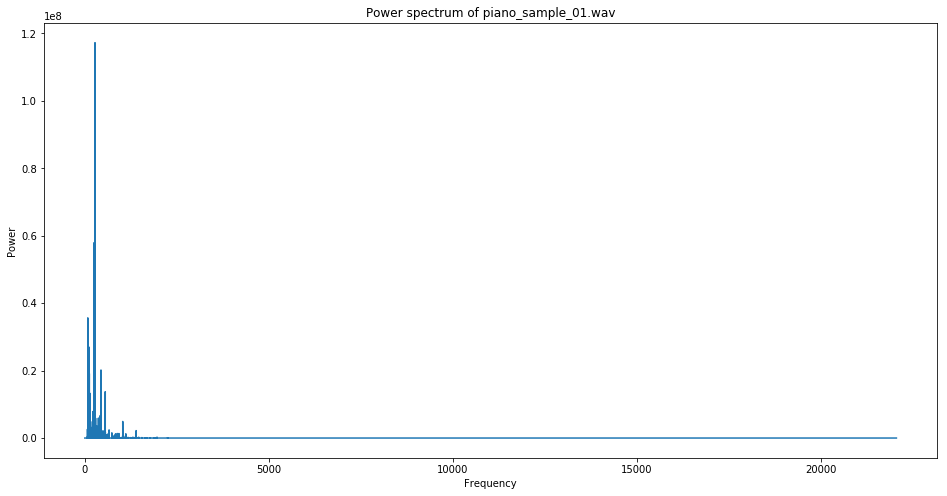

In [6]:
# Fast Fourier Transfrom(FFT) to Spectrum_Frequency vs. Magnitude_Frequency Domain ================================
# FFT를 진행하면, 시간의 정보가 날아간다.

fft = np.fft.fft(sig)

# 복소공간 값 절댓값 취해서, magnitude 구하기
magnitude = np.abs(fft)

# magnitude의 제곱이 power / magnitude에 log scale을 하면 dB
power = magnitude * magnitude
#log_spectrogram = librosa.amplitude_to_db(magnitude)

# Frequency 값 만들기
f = np. linspace(0, sr, len(power))

# 푸리에 변환을 통과한 spectrumd은 대칭구조로 나와서 high frequency 부분 절반을 날리고 앞쪽 절반만 사용한다.
left_spectrum = power[:int(len(power)/2)]
left_f = f[:int(len(power)/2)]

# Display Spectrum
plt.figure(figsize = FIG_SIZE)
plt.plot(left_f, left_spectrum)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Power spectrum of "+ file_name)

Text(0.5,1,'Log-spectrum of piano_sample_01.wav')

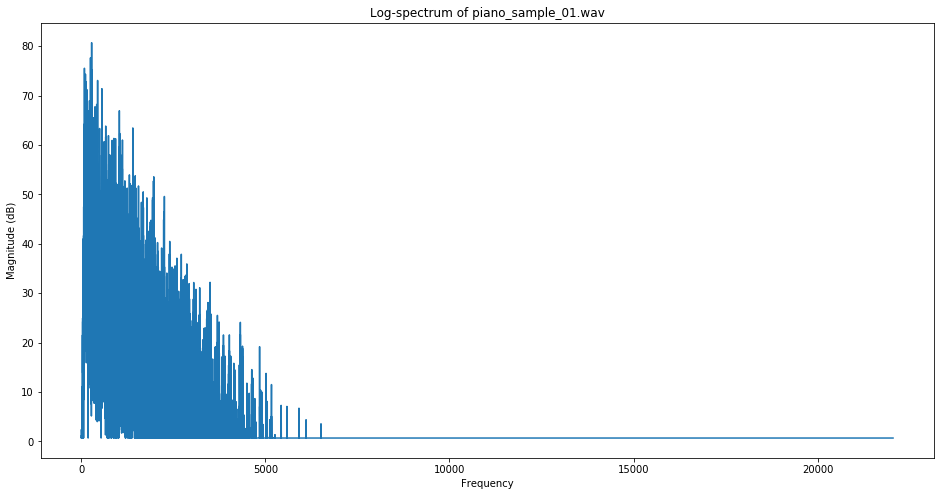

In [7]:
# Fast Fourier Transfrom(FFT) to Spectrum_Frequency vs. Magnitude_Frequency Domain ================================
# FFT를 진행하면, 시간의 정보가 날아간다.

fft = np.fft.fft(sig)

# 복소공간 값 절댓값 취해서, magnitude 구하기
magnitude = np.abs(fft)

# magnitude의 제곱이 power / magnitude에 log scale을 하면 dB
#power = magnitude * magnitude
log_spectrogram = librosa.amplitude_to_db(magnitude)

# Frequency 값 만들기
f = np. linspace(0, sr, len(log_spectrogram))

# 푸리에 변환을 통과한 spectrumd은 대칭구조로 나와서 high frequency 부분 절반을 날리고 앞쪽 절반만 사용한다.
left_spectrum = log_spectrogram[:int(len(log_spectrogram)/2)]
left_f = f[:int(len(log_spectrogram)/2)]

# Display Spectrum
plt.figure(figsize = FIG_SIZE)
plt.plot(left_f, left_spectrum)

plt.xlabel("Frequency")
plt.ylabel("Magnitude (dB)")
plt.title("Log-spectrum of "+ file_name)



In [8]:
# Short Time Fourier Transform(STFT) to Spectrogram_Time vs. Frequency vs. Amplitude ==============================
# STFT는 시간의 길이를 나눠서 퓨리에 변환을 한다.
# STFT의 결과는 시간의 흐름(Window)에 따른 주파수(Frequency)영역 별 진폭(Amplitude)를 반환한다.

# STFT

S = librosa.core.stft(sig, n_fft = 1024, hop_length = 512, win_length = 1024)

S.shape, len(S), len(S[0]), S, S[0], S[0][0], sr, sr/512
  # 위 스펙트럼은 1313 Hz의 폭으로 513개의 bin으로 분할되어 있다.

((513, 1313),
 513,
 1313,
 array([[-9.4824575e-02+0.0000000e+00j, -5.1657248e-02+0.0000000e+00j,
         -5.0169939e-01+0.0000000e+00j, ...,
         -6.4797443e-01+0.0000000e+00j, -4.5984820e-01+0.0000000e+00j,
         -2.6939185e-02+0.0000000e+00j],
        [-6.6674161e-01+1.6653345e-16j, -2.4430957e-01-6.8297577e-01j,
          7.6051841e+00-3.7471824e+00j, ...,
          3.0190310e+00+3.8231695e-01j,  2.0533340e+00-2.2007735e+00j,
         -8.5452050e-01-3.3276918e+00j],
        [ 2.9304161e+00+0.0000000e+00j,  2.2977872e+00+2.3775877e-01j,
         -9.2880983e+00+2.5788105e+01j, ...,
         -7.2539911e+00+4.0058303e-01j,  2.1302149e-01+2.3034945e+00j,
         -8.0865365e-01+4.4761329e+00j],
        ...,
        [ 2.3964002e-04+0.0000000e+00j,  2.8593681e-04+1.6468679e-04j,
          3.3182144e-04+3.1706493e-04j, ...,
         -2.4682478e-05+1.0639631e-05j, -1.7801068e-04-6.6749482e-05j,
         -2.1385607e-04+1.7069131e-05j],
        [-1.5071709e-05-5.5511151e-17j, -4.29262

In [9]:
# Short Time Fourier Transform(STFT) to Spectrogram_Time vs. Frequency vs. Amplitude ==============================
# STFT는 시간의 길이를 나눠서 퓨리에 변환을 한다.
# STFT의 결과는 시간의 흐름(Window)에 따른 주파수(Frequency)영역 별 진폭(Amplitude)를 반환한다.

# STFT
S = librosa.core.stft(sig, n_fft = 1024, hop_length = 512, win_length = 1024)

S.shape, len(S[0]), S[0][0], sr, sr/512
  # 위 스펙트럼은 1313 Hz의 폭으로 513개의 bin으로 분할되어 있다.

D = np.abs(S)**2

D.shape, len(D), len(D[0]), D, D[0], D[0][0]
  # 실수부를 제거하며, magnitude에 대한 데이터만 받아온다.

((513, 1313),
 513,
 1313,
 array([[8.9916997e-03, 2.6684713e-03, 2.5170228e-01, ..., 4.1987085e-01,
         2.1146037e-01, 7.2571973e-04],
        [4.4454437e-01, 5.2614301e-01, 7.1880196e+01, ..., 9.2607155e+00,
         9.0595846e+00, 1.1803738e+01],
        [8.5873384e+00, 5.3363552e+00, 7.5129510e+02, ..., 5.2780853e+01,
         5.3514643e+00, 2.0689686e+01],
        ...,
        [5.7427339e-08, 1.0888161e-07, 2.1063563e-07, ..., 7.2242651e-10,
         3.6143298e-08, 4.6025772e-08],
        [2.2715640e-10, 1.8566379e-07, 8.9839830e-08, ..., 3.3588137e-08,
         1.4529610e-08, 1.1654071e-07],
        [1.0331342e-09, 1.2132467e-07, 2.4504800e-08, ..., 3.0155526e-08,
         1.8924566e-09, 2.4626470e-07]], dtype=float32),
 array([0.0089917 , 0.00266847, 0.25170228, ..., 0.41987085, 0.21146037,
        0.00072572], dtype=float32),
 0.0089917)

In [10]:
# Mel Filter Bank =================================================================================================
# 사람의 귀는 인접한 주파수를 크게 구별하지 못하므로,
# 주파수들의 Bin 그룹을 만들고 이들을 합하는 방식으로, 주파수 영역에서 얼마만큼의 에너지가 있는지 찾아본다.
# 멜 필터는 저주파 주변에서 얼마만큼의 에너지가 있는지를 알려준다.
# 주파수가 올라갈수록 필터의 폭이 높아지면서 고주파는 거의 고려를 안하게 된다.

# Mel Spectrogram (512 --> 40)

mel_basis = librosa.filters.mel(sr, 1024, n_mels = 40)
mel_S = np.dot(mel_basis, D)

mel_S.shape, len(mel_S), len(mel_S[0]), mel_S, mel_S[0], mel_S[0][0]

((40, 1313),
 40,
 1313,
 array([[1.6406167e-01, 8.6399722e-01, 1.4691496e+01, ..., 1.1087310e+00,
         3.9639792e-01, 2.8675413e-01],
        [4.4423696e-01, 1.6487356e+00, 1.1767000e+01, ..., 5.0316691e-01,
         4.7448304e-01, 2.1822119e-01],
        [9.6057735e-02, 7.1733809e-01, 1.7634136e+01, ..., 2.8763723e-01,
         2.7938920e-01, 3.3819202e-01],
        ...,
        [5.7963656e-10, 1.2253739e-09, 1.4025053e-09, ..., 7.7812690e-10,
         6.8469519e-10, 2.7522846e-09],
        [3.9126130e-10, 1.5143665e-09, 1.1952139e-09, ..., 8.3234758e-10,
         5.8860267e-10, 2.4953928e-09],
        [6.1620609e-10, 1.1641380e-09, 9.8207520e-10, ..., 5.9734950e-10,
         5.2619636e-10, 2.4350872e-09]], dtype=float32),
 array([ 0.16406167,  0.8639972 , 14.691496  , ...,  1.108731  ,
         0.39639792,  0.28675413], dtype=float32),
 0.16406167)

In [11]:
# Log Compression =================================================================================================
# spectrogram 을 dB 단위로 전환한다.

# Log Compression

log_mel_S = librosa.power_to_db(mel_S)

log_mel_S.shape, len(log_mel_S), len(log_mel_S[0]), log_mel_S, log_mel_S[0], log_mel_S[0][0]

((40, 1313),
 40,
 1313,
 array([[ -7.849929  ,  -0.63487655,  11.67066   , ...,   0.44826204,
          -4.0186863 ,  -5.424903  ],
        [ -3.523853  ,   2.1715102 ,  10.706657  , ...,  -2.9828792 ,
          -3.2377932 ,  -6.6110306 ],
        [-10.174676  ,  -1.4427612 ,  12.463542  , ...,  -5.411549  ,
          -5.537904  ,  -4.7083664 ],
        ...,
        [-62.881775  , -62.881775  , -62.881775  , ..., -62.881775  ,
         -62.881775  , -62.881775  ],
        [-62.881775  , -62.881775  , -62.881775  , ..., -62.881775  ,
         -62.881775  , -62.881775  ],
        [-62.881775  , -62.881775  , -62.881775  , ..., -62.881775  ,
         -62.881775  , -62.881775  ]], dtype=float32),
 array([-7.849929  , -0.63487655, 11.67066   , ...,  0.44826204,
        -4.0186863 , -5.424903  ], dtype=float32),
 -7.849929)

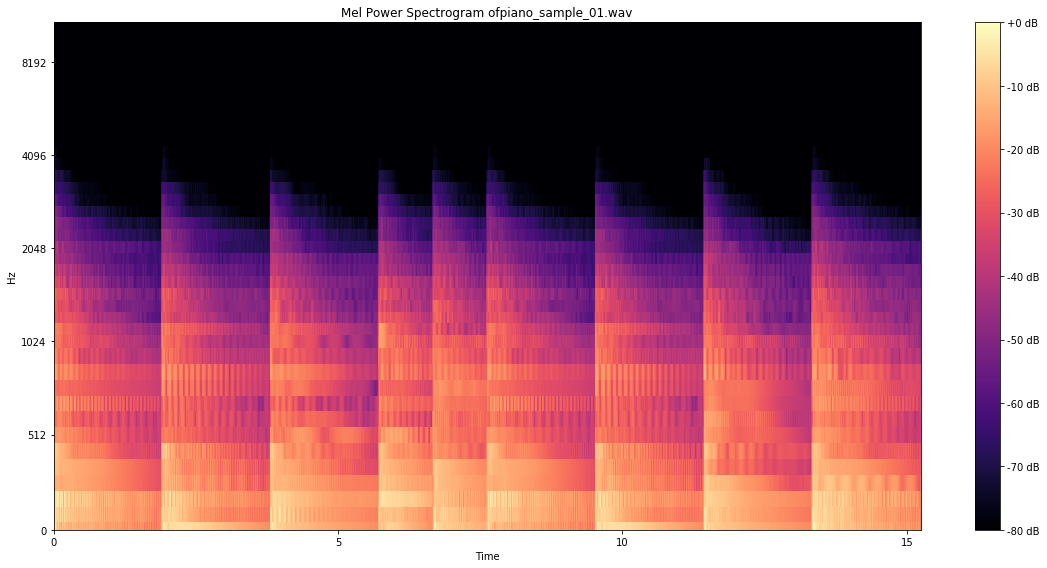

In [12]:
# Mel Power Spectrogram ===========================================================================================

S = librosa.feature.melspectrogram(sig, sr = sr, n_mels = 40)
log_S = librosa.power_to_db(S, ref = np.max)

plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(log_S, sr = sr, x_axis = 'time', y_axis = 'mel')

plt.title('Mel Power Spectrogram of' + file_name)
plt.colorbar(format = "%+2.0f dB")
plt.tight_layout()


Text(0.5,1,'Spectrogram (dB) of piano_sample_01.wav')

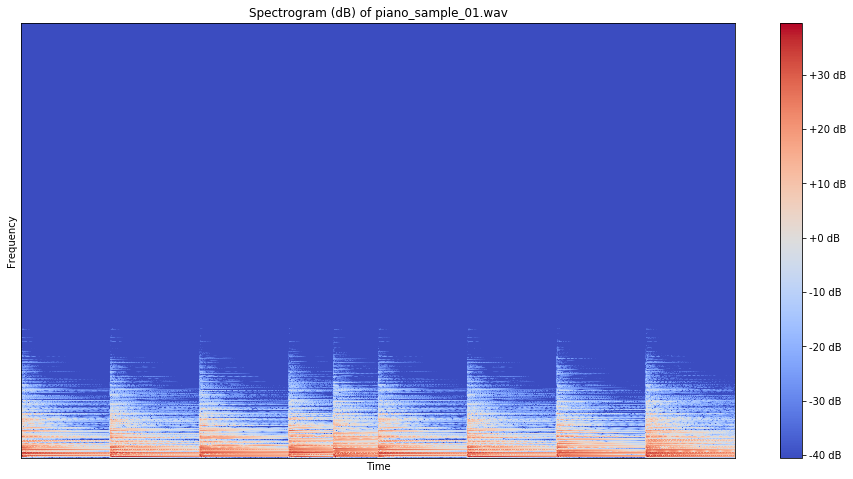

In [13]:
# Short Time Fourier Transform(STFT) to Spectrogram_Time vs. Frequency vs. Amplitude ==============================
# STFT는 시간의 길이를 나눠서 퓨리에 변환을 한다.
# STFT의 결과는 시간의 흐름(Window)에 따른 주파수(Frequency)영역 별 진폭(Amplitude)를 반환한다.

# STFT -> Spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048      # frame 하나 당 sample 수

# Caculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft = n_fft, hop_length = hop_length)

# 복소공간 값 절댓값 취해서, magnitude 구하기
magnitude = np.abs(stft)

# Magnitude -> Decibels by log scaling
log_spectrogram = librosa.amplitude_to_db(magnitude)

# Display Spectrogram
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format = "%+2.0f dB")
plt.title("Spectrogram (dB) of "+ file_name)

In [14]:
# Discrete Cosine Transform (DCT) =================================================================================
# DCT는 n개의 데이터를 n개의 코사인 함수의 합으로 표현하여 데이터 양을 줄이는 방식이다.
# 저 주파수에 에너지가 집중되고, 고 주파수 영역에 에너지가 감소한다.
# DCT는 에너지들 사이에 상관관계를 분리해주는 역활을 한다.

# Mel Frequency Cepstral Coefficients(MFCC) =======================================================================

mfcc = librosa.feature.mfcc(S = log_mel_S, n_mfcc = 13)
mfcc = mfcc.astype(np.float32)   # to save the memory(64 to 32 bits)

mfcc.shape, len(mfcc), len(mfcc[0]), mfcc, mfcc[0], mfcc[0][0]

((13, 1313),
 13,
 1313,
 array([[-2.3758415e+02, -1.9362325e+02, -1.8338268e+02, ...,
         -2.6368341e+02, -2.6374072e+02, -2.6396671e+02],
        [ 1.2636337e+02,  1.5862099e+02,  1.7028807e+02, ...,
          1.3077065e+02,  1.3035910e+02,  1.3208371e+02],
        [-1.1022305e+01, -1.4248910e+01, -5.1223207e+00, ...,
          2.8014458e+01,  2.8050339e+01,  3.1652555e+01],
        ...,
        [ 4.4413218e+00,  1.4831966e+00,  3.2568989e+00, ...,
         -5.2227032e-01, -1.7556347e+00, -2.7863300e-01],
        [ 1.7035151e-01, -7.6838613e+00, -5.5299802e+00, ...,
         -3.1723819e+00, -2.4336636e+00, -1.7583910e+00],
        [-2.6223724e+00, -6.7169886e+00, -5.4000378e+00, ...,
         -1.7560875e+00, -1.8346620e+00, -3.1341033e+00]], dtype=float32),
 array([-237.58415, -193.62325, -183.38268, ..., -263.6834 , -263.74072,
        -263.9667 ], dtype=float32),
 -237.58415)

(13, 1313)
13
1313
[ 0.56327415  0.3798897  -0.39692086 -0.6385061  -0.14334182  0.34992662
  0.3454595   0.23477718  0.36261693  0.4235351   0.14199716 -0.18668327
 -0.11858612]
-3.7669888


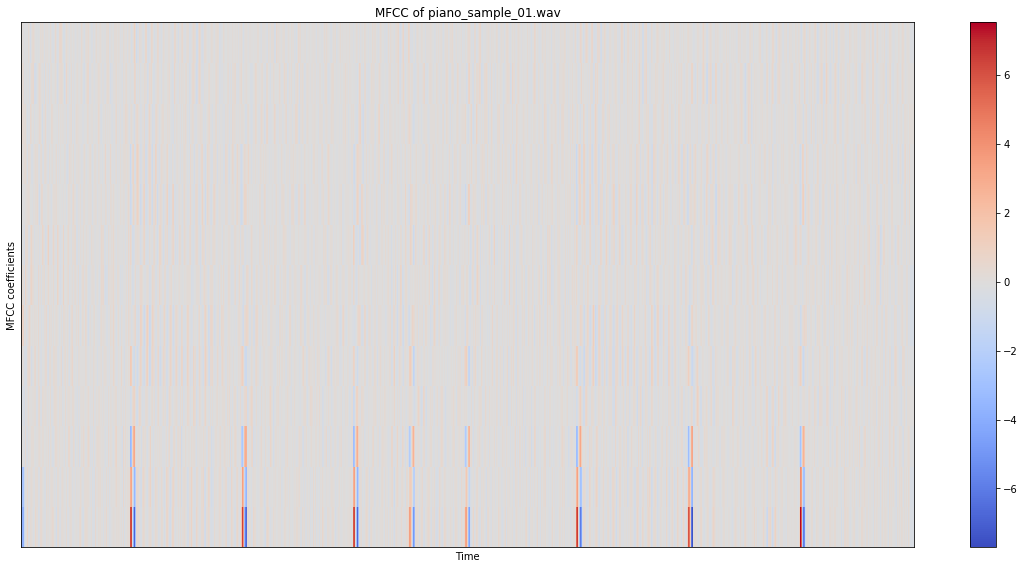

In [15]:
# Mel Frequency Cepstral Coefficients(MFCC) =======================================================================

mfcc = librosa.feature.mfcc(S = log_mel_S, n_mfcc = 13)
delta2_mfcc = librosa.feature.delta(mfcc, order = 2)   # order = 2 : 이계도함수

print(delta2_mfcc.shape)   #(number of mfccs caculated, number of frames available)
print(len(delta2_mfcc))
print(len(delta2_mfcc[0]))
print(delta2_mfcc[:,1000])
print((delta2_mfcc[0][0]))

plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(delta2_mfcc)

plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.title("MFCC of " + file_name)
plt.colorbar()
plt.tight_layout()



(13, 1313)


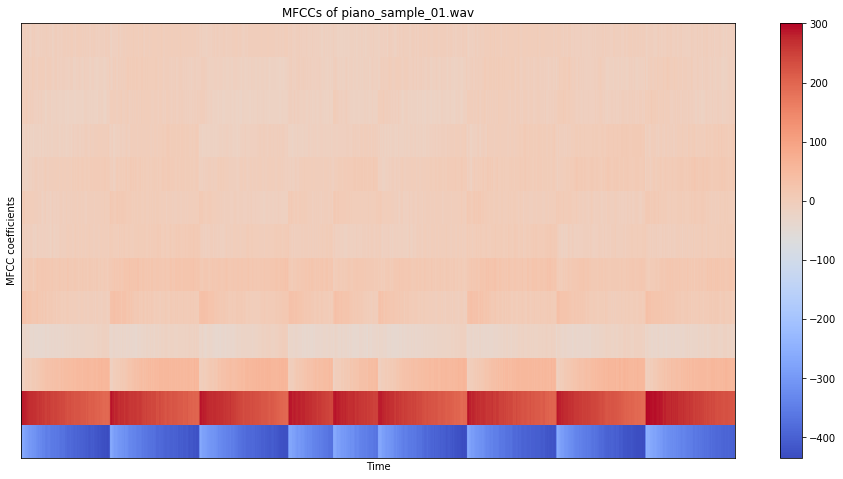

In [16]:
# Mel Frequency Cepstral Coefficients(MFCC) =======================================================================

# Extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)

print(MFCCs.shape)  #(number of mfccs caculated, number of frames available)

# Display MFCCs
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(MFCCs, sr = sr, hop_length = hop_length)

plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs of "+ file_name)

# Show plots
plt.show()